# adverSCarial
*adverSCarial* is a list of functions aiming to run adversarial attack on single cell classification algorithms.


# MinChange Attack
In this notebook we present a minChange adversarial attack.
Our objective is to make the smallest alteration possible to the expression of a gene in a group of cells, with the aim of modifying the classification made by the classifier. To minimize the change, we can specify a list of key genes that the function should not alter - in our situation the list of marker genes (cf: 001_R_prepare_data_with_Seurat.ipynb)

# Need for the Attack
1. the adverSCarial library
2. a Seurat object
2. a classifier

In [1]:
# Libraries
library(randomForest)
library(Seurat)
library(stringr)
# Notebook plot sizes
options(repr.plot.width=15, repr.plot.height=12)

# adverSCarial library
source("R/adverscarial.r")
# Seurat object
pbmc = readRDS("data/datasets/pbmc.rds")
# classifier: classifier in rf object
load("classifiers/rf_scrnaseq")

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.

Attaching SeuratObject



# Look at the pbmc object

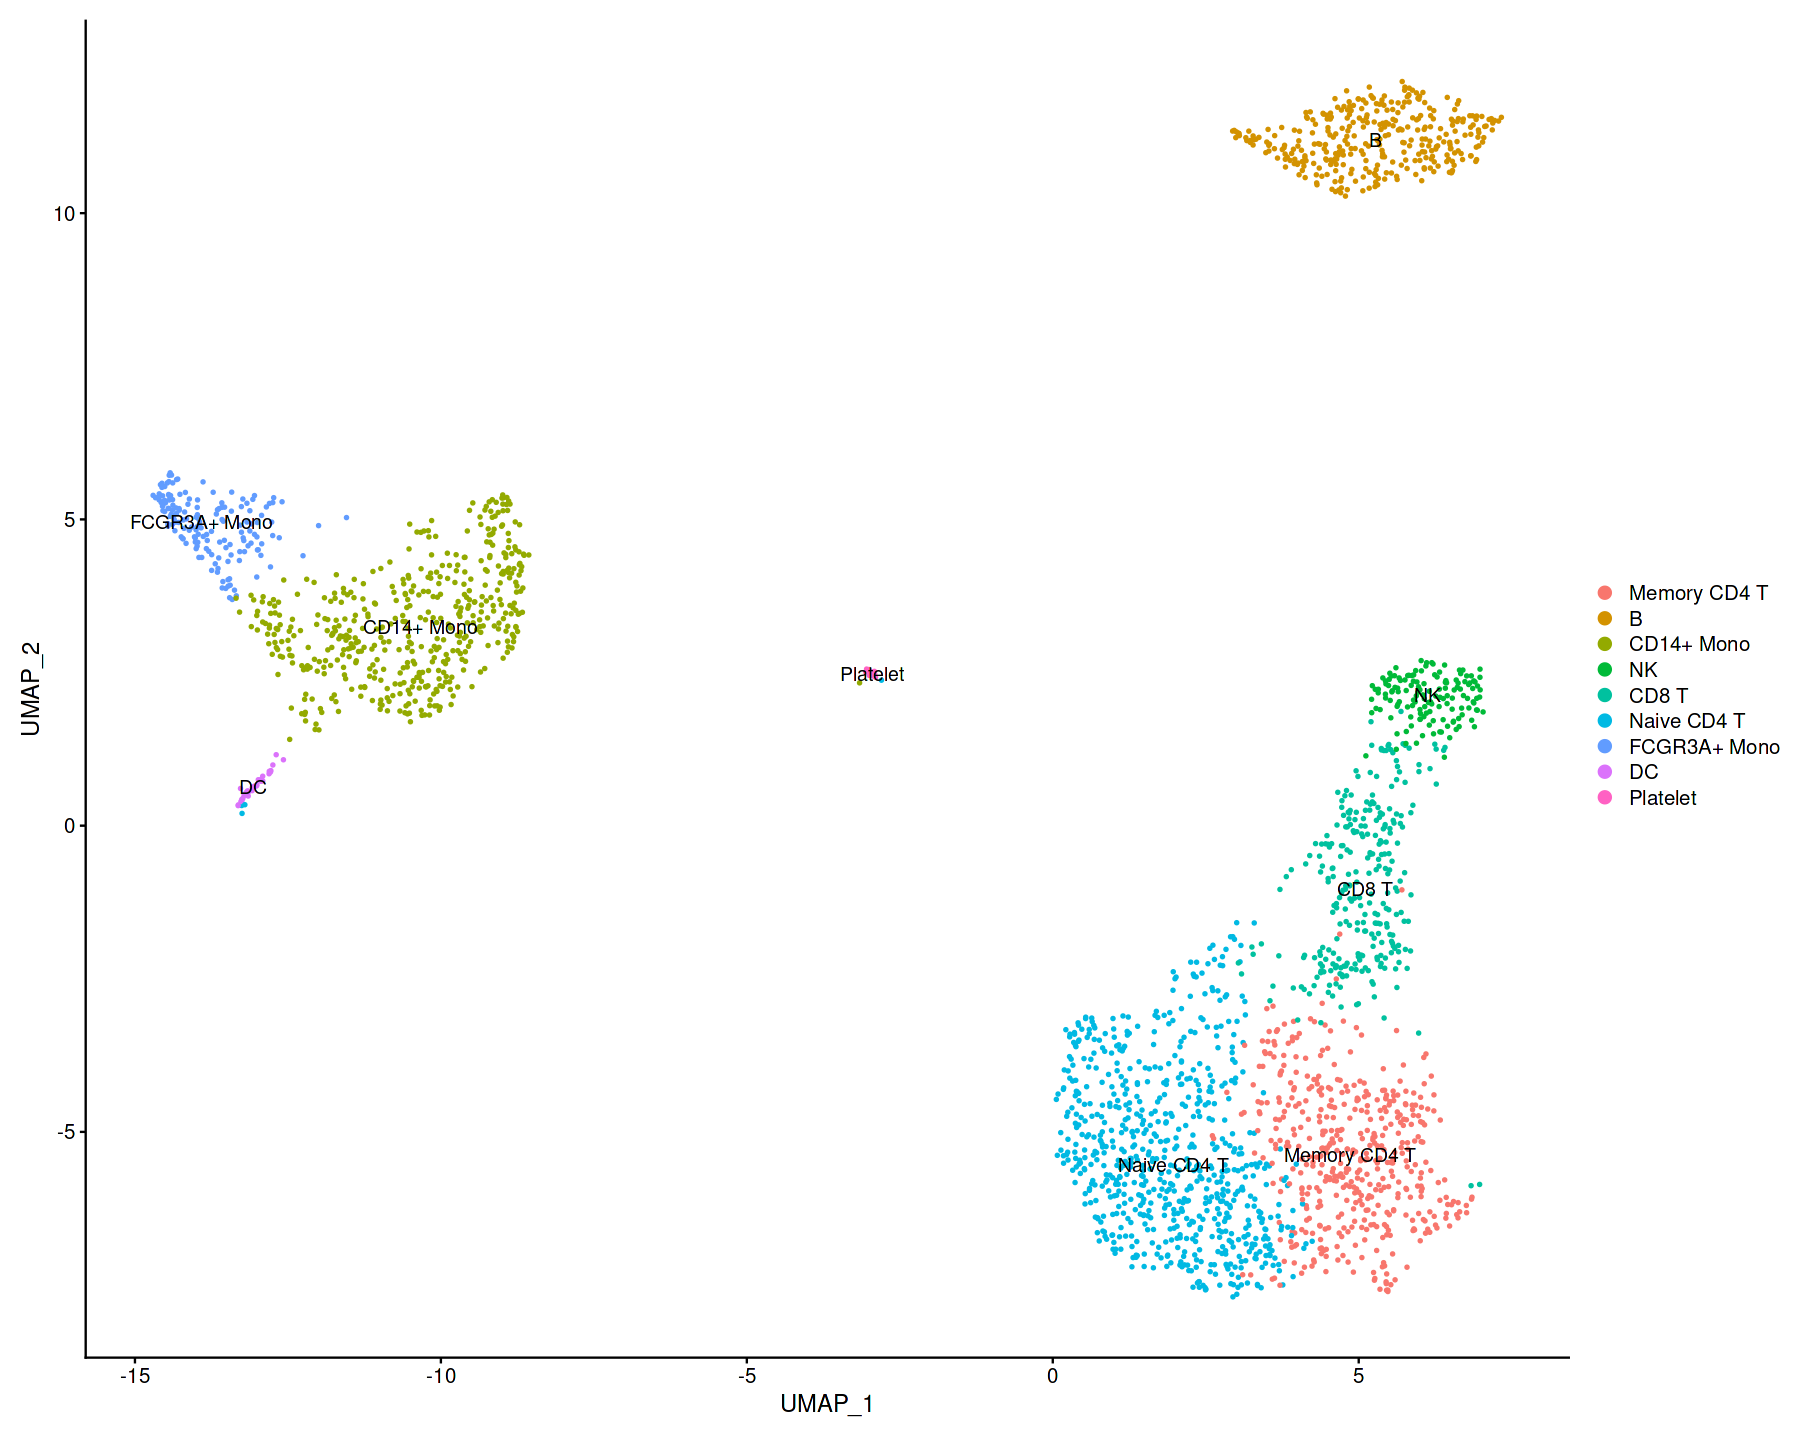

In [2]:
DimPlot(pbmc, reduction = "umap", label = TRUE, pt.size = 0.5)

In [3]:
# Known markers for each cell type
c_markers = c("IL7R", "CCR7", "CD14", "LYZ", "S100A4", "MS4A1", "CD8A", "FCGR3A", "MS4A7",
              "GNLY", "NKG7", "FCER1A", "CST3", "PPBP")

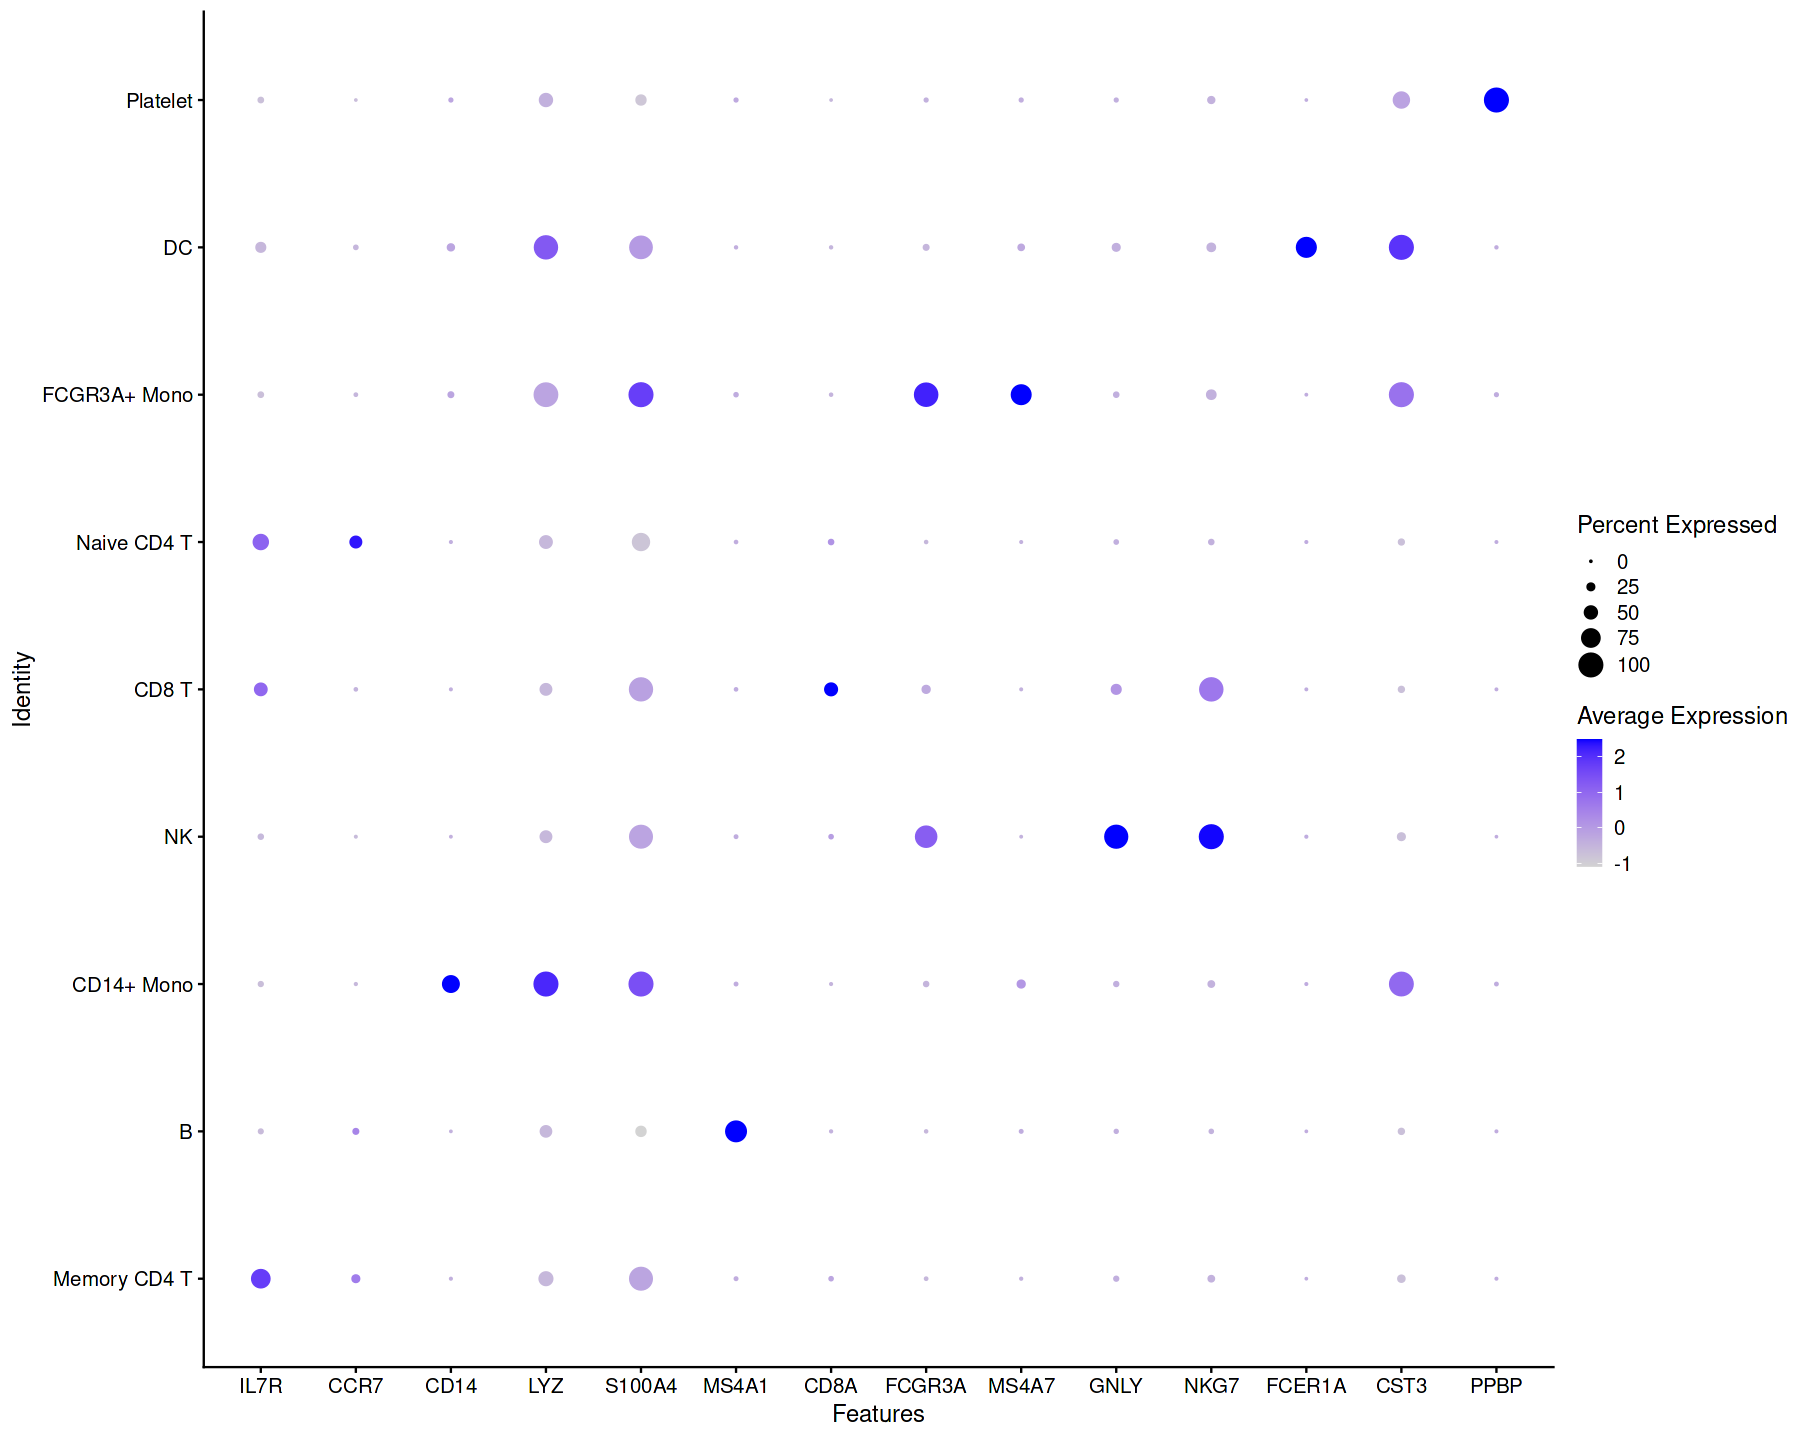

In [4]:
DotPlot(pbmc, features=c_markers)

In [5]:
# Retrieve needed data from pbmc object
rna_matrix = t(as.matrix(pbmc@assays$RNA@counts))
clusters_id = pbmc@meta.data$manual_annotation

# Adapt the classifier

`rf` is a RandomForest classifier that, when given a list of RNA values for a cell, returns a specific cell type from that list. We need to adjust the classifier so that it can assign a cell type to a group of cells.
    
A classifier function has to be formated as follow to be used with *adverSCarial*:
```R
    classifier = function(expr, clusters, target){
                
                
                c("cell type", trust_value)
    }
```
    
The matrix `expr` contains RNA expression values, the list `clusters` consists of the cluster IDs for each cell in `expr`, and `target` is the ID of the cluster for which we want to have a classification. The function returns a vector with the classification result, and a trust indice.

In [6]:
RFClassifier = function(expr, clusters, target){
    set.seed(20)
    colnames(expr) = str_replace_all(colnames(expr),"-","_")
    colnames(expr) = str_replace(colnames(expr),"^","g_")
    
    rf_features = names(rf$forest$xlevels)
    c_diff_genes = setdiff(rf_features, colnames(expr))
    expr = as.data.frame(expr)
    expr[,c_diff_genes] = 0
    
    final_predictions <- predict(rf, expr[clusters==target,])
    ratio = as.numeric(sort(table(final_predictions), decreasing = T)[1]) / sum(as.numeric(sort(table(final_predictions), decreasing = T)))
    predicted_class = names(sort(table(final_predictions), decreasing = T)[1])
    if ( ratio < 0.5){
        predicted_class = "NA"
    }
    c(predicted_class, ratio)
}

# Run the attack on the *DC* cluster

In [7]:
c_min_change = advMinChange(rna_matrix, clusters_id, "DC", RFClassifier,adv_method="perc99",excl_genes=c_markers, verbose=F)

Split number: 1/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

create mask

modify data

Classifier

DC

0.53125

create mask

modify data

Classifier

DC

0.53125

Split time: 6.18256092071533

Split number: 2/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

create mask

modify data

Classifier

DC

0.53125

create mask

modify data

Classifier

DC

0.53125

Split time: 5.00355362892151

Split number: 3/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

create mask

modify data

Classifier

DC

0.5

create mask

modify data

Classifier

DC

0.53125

Split time: 5.02423119544983

Split number: 4/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

create mask

modify data

Classifier

DC

Classifier

DC

0.53125

Split time: 5.11579775810242

Split number: 28/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

create mask

modify data

Classifier

DC

0.53125

create mask

modify data

Classifier

DC

0.53125

Split time: 4.99993443489075

Split number: 29/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

create mask

modify data

Classifier

DC

0.53125

create mask

modify data

Classifier

DC

0.53125

Split time: 5.19652247428894

Split number: 30/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

create mask

modify data

Classifier

DC

0.5625

create mask

modify data

Classifier

DC

0.5

Split time: 4.92275261878967

Split number: 31/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”

Classifier

DC

0.53125

Split time: 4.85762405395508

Split number: 45/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

create mask

modify data

Classifier

DC

0.53125

create mask

modify data

Classifier

DC

0.5625

Split time: 5.09987902641296

Split number: 46/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

create mask

modify data

Classifier

DC

0.53125

create mask

modify data

Classifier

DC

0.53125

Split time: 5.04674100875854

Split number: 47/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

create mask

modify data

Classifier

DC

0.53125

create mask

modify data

Classifier

DC

0.53125

Split time: 5.07196140289307

Split number: 48/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split varia

genes size: 137

create mask

modify data

Classifier

DC

0.53125

create mask

modify data

Classifier

DC

0.53125

Split time: 6.8888373374939

Split number: 67/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

create mask

modify data

Classifier

DC

0.53125

create mask

modify data

Classifier

DC

0.53125

Split time: 6.41321969032288

Split number: 68/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

create mask

modify data

Classifier

DC

0.53125

create mask

modify data

Classifier

DC

0.53125

Split time: 5.28139352798462

Split number: 69/100

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 137

create mask

modify data

Classifier

DC

0.5625

create mask

modify data

Classifier

DC

0.53125

Split time: 5.29597568511963

Split number: 70/100

Warnin

Classifier

CD14+ Mono

0.5

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 17

create mask

modify data

Classifier

CD14+ Mono

0.5

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 9

create mask

modify data

Classifier

CD14+ Mono

0.5

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 5

create mask

modify data

Classifier

CD14+ Mono

0.5

Warning message in split.default(unlist(genes), 1:2):
“data length is not a multiple of split variable”
genes size: 3

create mask

modify data

Classifier

CD14+ Mono

0.5

genes size: 2

create mask

modify data

Classifier

DC

0.53125

create mask

modify data

Classifier

CD14+ Mono

0.5

Store gene 2:

LGALS2

create mask

modify data

Classifier

DC

0.53125

create mask

modify data

Classifier

DC

0.53125

create mask

modify data

Cl

In [9]:
c_min_change

$S100A8
[1] "CD14+ Mono" "0.5"       

$NUP214
[1] "CD14+ Mono" "0.53125"   

$TBX21
[1] "NA"      "0.46875"

$BLVRA
[1] "CD14+ Mono" "0.625"     

$CD68
[1] "NA"      "0.46875"

$PPP4C
[1] "CD14+ Mono" "0.5"       

$SPIB
[1] "NA"      "0.46875"

$SEC14L1
[1] "NA"      "0.46875"

$LGALS2
[1] "CD14+ Mono" "0.5"       

$WDR1
[1] "CD14+ Mono" "0.53125"

### The result is:

- 6 different attacks to transform the cluster into *CD14+ Mono* with the perc99 modification
    - *S100A8*
    - *NUP214*
    - *BLVRA*
    - *PPP4C*
    - *LGALS2*
    - *WDR1*
- 4 different attacks to transform the cluster into an undetermined cell type
    - *TBX21*
    - *CD68*
    - *SPIB*
    - *SEC14L1*

## Lets try the attack
Apply *perc99* modification to *DC* cluster on gene *AAK1*, this should make the classifier label it as *CD14+ Mono*

In [10]:
# apply the "perc99" modification to "DC" cluster on gene "AAK1"
BLVRA_attack_rna_matrix = advModifications(rna_matrix, c("BLVRA"), pbmc@meta.data$manual_annotation, "DC", adv_method="perc99")

create mask

modify data



### Create the Seurat object

In [11]:
pbmc_BLVRA_attack <- CreateSeuratObject(counts = t(BLVRA_attack_rna_matrix), project = "pbmc3k_BLVRA_attack")

In [12]:
# Filter, normalize and find features
pbmc_BLVRA_attack[["percent.mt"]] <- PercentageFeatureSet(pbmc_BLVRA_attack, pattern = "^MT-")
pbmc_BLVRA_attack <- subset(pbmc_BLVRA_attack, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & percent.mt < 5)
pbmc_BLVRA_attack <- NormalizeData(pbmc_BLVRA_attack, normalization.method = "LogNormalize", scale.factor = 10000)
pbmc_BLVRA_attack <- FindVariableFeatures(pbmc_BLVRA_attack, selection.method = "vst", nfeatures = 2000)

# Scale and run PCA
pbmc_BLVRA_attack <- ScaleData(pbmc_BLVRA_attack, features = rownames(pbmc_BLVRA_attack))
pbmc_BLVRA_attack <- RunPCA(pbmc_BLVRA_attack, features = VariableFeatures(object = pbmc_BLVRA_attack))

# Cluster and visualize
pbmc_BLVRA_attack <- FindNeighbors(pbmc_BLVRA_attack, dims = 1:10)
pbmc_BLVRA_attack <- FindClusters(pbmc_BLVRA_attack, resolution = 0.5)
pbmc_BLVRA_attack <- RunUMAP(pbmc_BLVRA_attack, dims = 1:10)

Centering and scaling data matrix

PC_ 1 
Positive:  CST3, TYROBP, LST1, AIF1, FTL, LYZ, FTH1, FCN1, S100A9, TYMP 
	   FCER1G, CFD, LGALS1, S100A8, CTSS, LGALS2, SERPINA1, IFITM3, SPI1, CFP 
	   PSAP, IFI30, SAT1, COTL1, S100A11, NPC2, GRN, LGALS3, GSTP1, PYCARD 
Negative:  MALAT1, LTB, IL32, IL7R, CD2, B2M, ACAP1, CD27, STK17A, CTSW 
	   CD247, GIMAP5, AQP3, CCL5, SELL, TRAF3IP3, GZMA, MAL, CST7, ITM2A 
	   MYC, GIMAP7, HOPX, BEX2, LDLRAP1, GZMK, ETS1, ZAP70, TNFAIP8, RIC3 
PC_ 2 
Positive:  CD79A, MS4A1, TCL1A, HLA-DQA1, HLA-DQB1, HLA-DRA, LINC00926, CD79B, HLA-DRB1, CD74 
	   HLA-DMA, HLA-DPB1, HLA-DQA2, CD37, HLA-DRB5, HLA-DMB, HLA-DPA1, FCRLA, HVCN1, LTB 
	   BLNK, P2RX5, IGLL5, IRF8, SWAP70, ARHGAP24, FCGR2B, SMIM14, PPP1R14A, C16orf74 
Negative:  NKG7, PRF1, CST7, GZMB, GZMA, FGFBP2, CTSW, GNLY, B2M, SPON2 
	   CCL4, GZMH, FCGR3A, CCL5, CD247, XCL2, CLIC3, AKR1C3, SRGN, HOPX 
	   TTC38, APMAP, CTSC, S100A4, IGFBP7, ANXA1, ID2, IL32, XCL1, RHOC 
PC_ 3 
Positive:  HLA-DQA1, CD79A,

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2638
Number of edges: 95925

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8714
Number of communities: 9
Elapsed time: 0 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
07:39:51 UMAP embedding parameters a = 0.9922 b = 1.112

07:39:51 Read 2638 rows and found 10 numeric columns

07:39:51 Using Annoy for neighbor search, n_neighbors = 30

07:39:51 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

07:39:51 Writing NN index file to temp file /tmp/RtmpH2ZwDW/file3453d12b287582

07:39:51 Searching Annoy index using 1 thread, search_k = 3000

07:39:52 Annoy recall = 100%

07:39:52 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors

### Annotate with classifier to see if the attack fooled the classifier

In [13]:
# Add metadata auto_annotation to Seurat object
pbmc_BLVRA_attack[["auto_annotation"]] = ""
attack_rna_matrix = t(as.matrix(pbmc_BLVRA_attack@assays$RNA@counts))
attack_clusters_id = pbmc_BLVRA_attack@meta.data$seurat_clusters

for ( int_cluster in sort(unique(pbmc_BLVRA_attack@meta.data$seurat_clusters))){
    autom_classification = RFClassifier(attack_rna_matrix, attack_clusters_id, int_cluster)
    autom_classification = autom_classification[1]
    pbmc_BLVRA_attack@meta.data[pbmc_BLVRA_attack@meta.data$seurat_clusters == int_cluster, "auto_annotation"] = paste(int_cluster,autom_classification)
    message(paste("Cluster",int_cluster,"is",autom_classification))
}

Cluster 0 is Naive CD4 T

Cluster 1 is CD14+ Mono

Cluster 2 is Memory CD4 T

Cluster 3 is B

Cluster 4 is CD8 T

Cluster 5 is FCGR3A+ Mono

Cluster 6 is NK

Cluster 7 is CD14+ Mono

Cluster 8 is Platelet



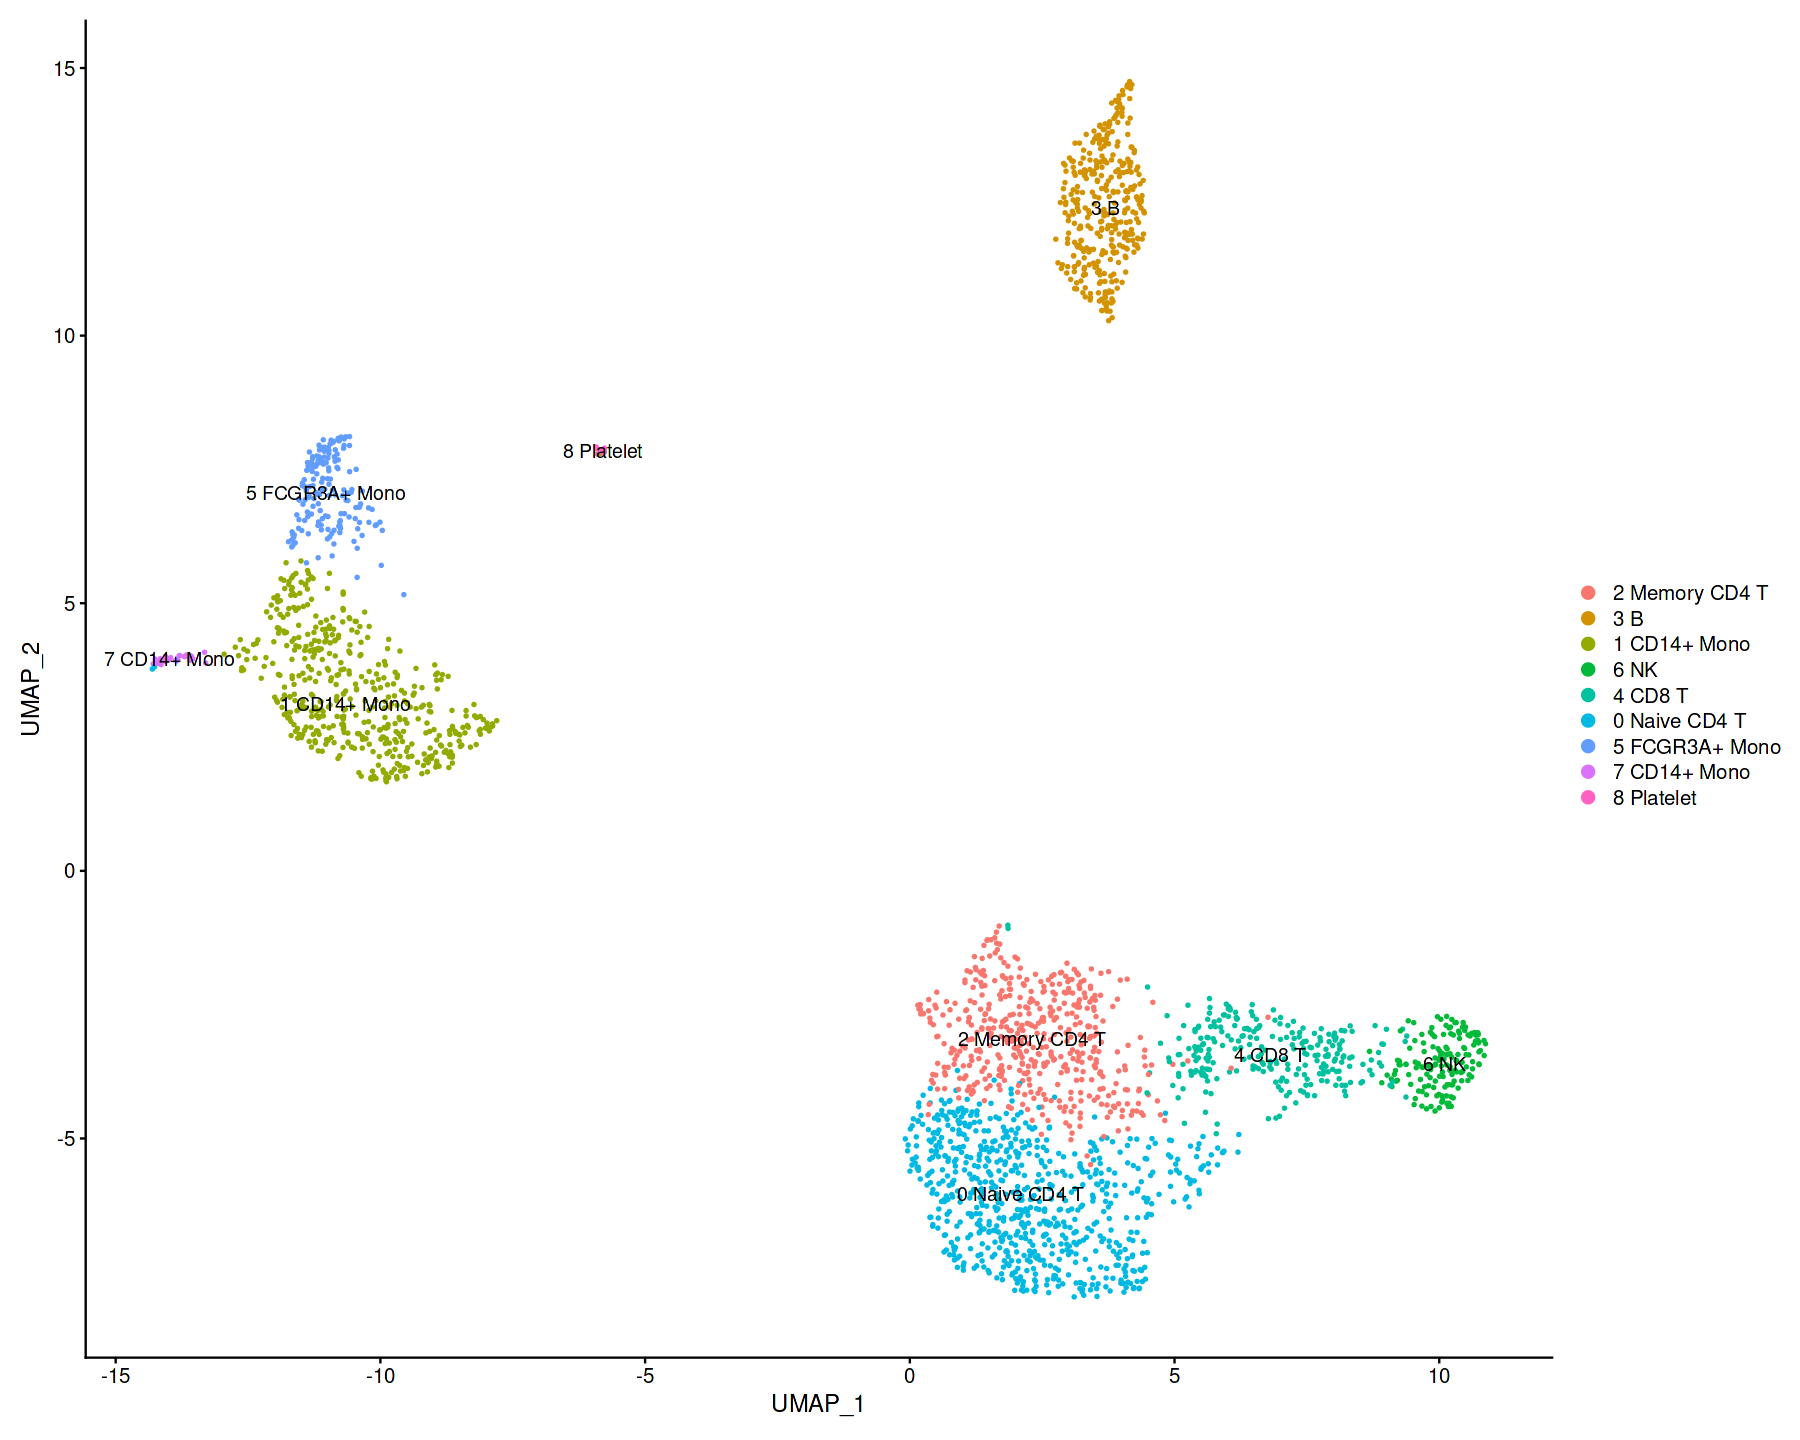

In [14]:
Idents(pbmc_BLVRA_attack) = "auto_annotation"
DimPlot(pbmc_BLVRA_attack, reduction = "umap", label = TRUE, pt.size = 0.5)

# We can see on the dotplot below that cluster 7 still looks like a *DC* cluster to a human because of its *FCER1A* and *CST3* markers

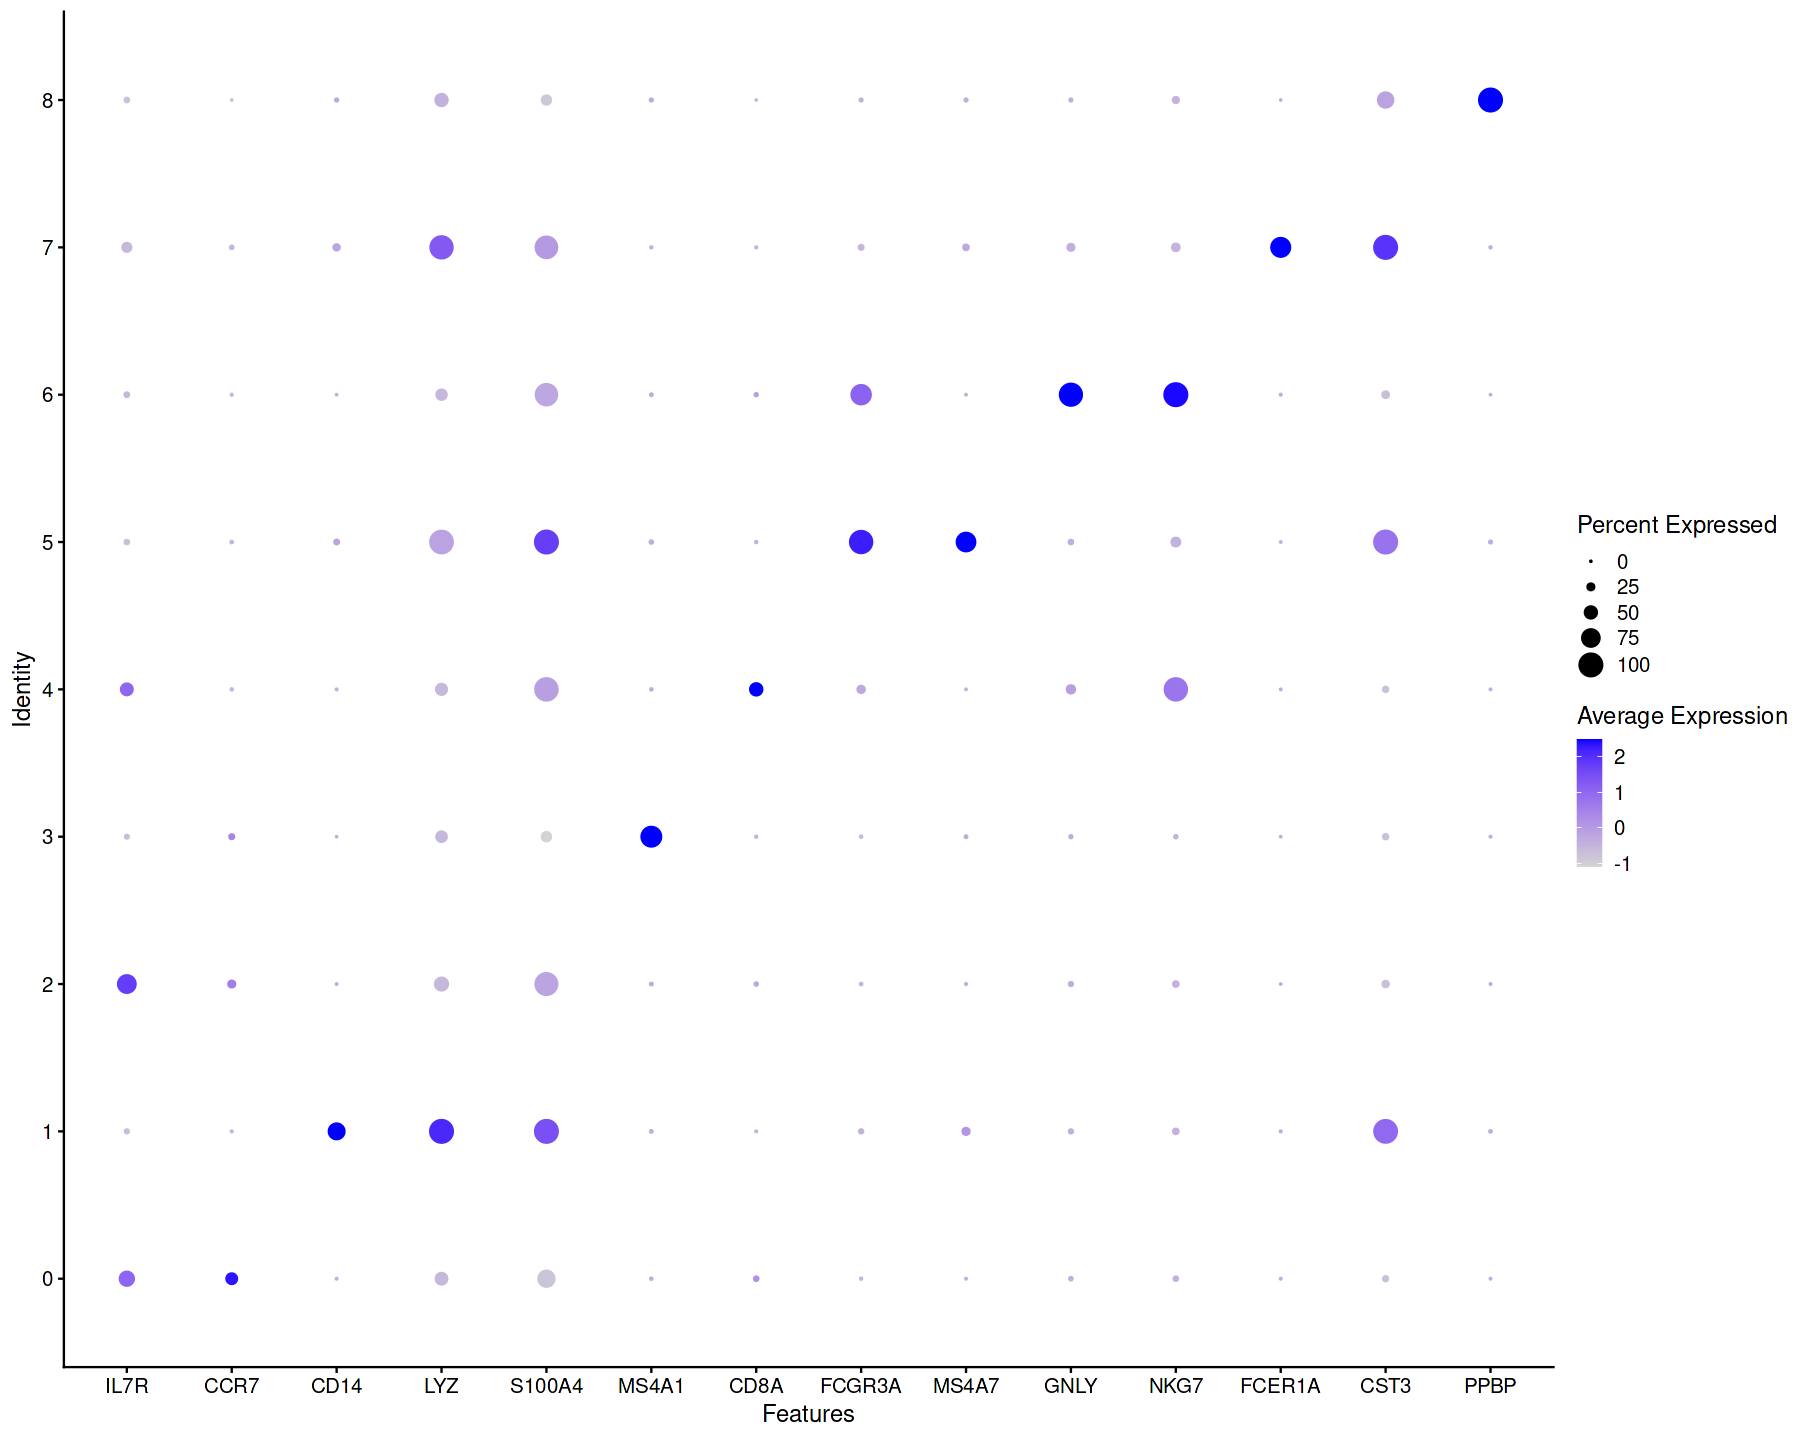

In [15]:
Idents(pbmc_BLVRA_attack) = "seurat_clusters"
DotPlot(pbmc_BLVRA_attack, features=c_markers)

In [16]:
save.image("session/FG_004")